## Instructions
- See deadline on the course web page
- See examination rules on the course web page.
- This problem set is performed individually (collaboration is encouraged, but each individual must be able to explain all of his/her hand-in solutions).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [63]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Brou Boni'  # string
student['Firstname']='Joel' # string
student['CID']='joelaho'        # string
student['DOB-year']=1999         # four-digit integer
student['DOB-month']=5           # integer in the range [1, 12]
student['DOB-day']=11             # integer in the range [1, 31]

# 
# YOUR CODE HERE
# 

In [64]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 2
## Basic problems
### Learning from data [TIF285], Chalmers, Fall 2020

Last revised: 16-Sep-2020 by Christian Forssén [christian.forssen@chalmers.se]

In [65]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 1: Coin tossing
### (2 points)

Read the data with simulated coin tosses from the file `cointosses.dat`.
Each row corresponds to a single toss: 0=tails; 1=heads

Extract the mean and 95% DOB intervals from the first 8 tosses, the first 64 tosses, the first 512 tosses and all 4096 tosses in the data assuming a uniform prior for the probability $p_H$ of obtaining heads in a single toss.

*Hint*: Sample code for computing the DOB interval is available in the demonstration notebook `demo-BayesianBasics.ipynb`.

In [66]:
# importing modules

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats
from scipy.stats import norm, uniform
import math
import seaborn as sns

import matplotlib.pyplot as plt
#...

# 
# YOUR CODE HERE
# 

In [67]:
# Read data
data = np.loadtxt(f'{DATA_DIR}/cointosses.dat')

In [68]:
# Optional. 
# Insert utility code / functions here.

# 
# YOUR CODE HERE
# 
def dist_stuff(dist):
  
    # For x = median, mean: return x and the value of the pdf at x as a list
    median = [dist.median(), dist.pdf(dist.median())]  
    mean = [dist.mean(), dist.pdf(dist.mean())]
    # The left and right limits of the credibility interval are returned
    cred68 = dist.interval(0.68)
    cred95 = dist.interval(0.95)
    return median[0], mean[0], cred68, cred95


def dist_mode(dist, x):
    
    x_max_index = dist.pdf(x).argmax()
    # Return x of the maximum and the value of the pdf at that x 
    mode = [x[x_max_index], dist.pdf(x[x_max_index])]
    return mode[0]

In [69]:
# Define a function that returns the mean, median, and 68%/95% credible intervals 
# of the Bayesian posterior with an input data array of coin flips 
# and using a uniform [0,1] prior for the pH probability of getting a head result.

def bayesian_analysis_coin_flips(data_coin_tosses):
    """
    Returns various Bayesian analysis results for the given data of coin tosses.
    
    The posterior is p( pH | data, I).
    Assume a uniform p(pH|I) = U[0,1] prior
    
    Args:
        data_coin_tosses: Array of shape (m,) with 'm' independent binary data.
            0 = tails; 1 = heads
            
    Returns:
        (mean, mode, median, dob68, dob95): A tuple with the following elements
            mean: The mean of the posterior distribution (float)
            mode: The mode of the posterior distribution (float)
            median: The median of the posterior distribution (float)
            dob68: A tuple (lo,hi) with the lower and upper limits of the 
                68% degree-of-belief range of the posterior distribution (float,float)
            dob95: A tuple (lo,hi) with the lower and upper limits of the 
                95% degree-of-belief range of the posterior distribution (float,float)
    """
    ModeTest = np.linspace(0, 1, 301)
    heads=np.sum(data_coin_tosses)
    alpha = 1 
    beta=1
    N=len(data_coin_tosses)
    
    
    X=stats.beta(alpha+heads,beta+N-heads)
    Modepos=X.pdf(ModeTest).argmax()
    mode= ModeTest[Modepos]
    
    median, mean, dob68, dob95 = dist_stuff(X)
    
    return mean, mode, median, dob68, dob95

meanTest, modeTest, medianTest, dob68Test,dOb95 = bayesian_analysis_coin_flips(data)

In [70]:
(mean, mode, median, dob68, dob95) = bayesian_analysis_coin_flips(data[:1])
for output in (mean, mode, median, dob68[0], dob95[0]):
    assert output.dtype=='float64', 'Wrong type'
assert len(dob68)==2, 'DoB tuple should be of length 2'
assert len(dob95)==2, 'DoB tuple should be of length 2'
assert np.abs(mean-0.333)<0.001
assert np.abs(mode-0.0)<0.001
assert np.abs(median-0.293)<0.001


## Problem 2: Straight line fitting
### (2 points)

We will be fitting a straight line to a set data. Our model has two parameters $\theta=[b,m]$

$$
y_M(x) = mx + b
$$

And our statistical model assumes that errors are normally distributed

$$
y_i = y_M(x_i;\theta) + \mathcal{N}(0, \sigma^2),
$$

with fixed $\sigma = 50$

Read the data from the file `straightline.dat`.

<ErrorbarContainer object of 3 artists>

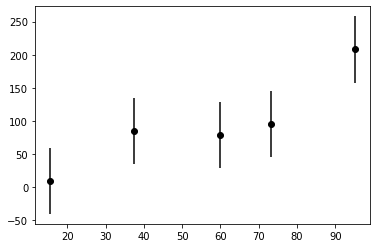

In [71]:
# Load the data and plot with fixed error bar 
# Use np.loadtxt() for loading data (the argument 'unpack=True' is useful)
# and plt.errorbar() for plotting data with errorbars

# 
# YOUR CODE HERE
# 
x,y = np.loadtxt(f'{DATA_DIR}/straightline.dat',unpack=True)
fig, ax = plt.subplots()
dy=50
plt.errorbar(x,y,dy,fmt="ok")

We use a flat prior for the intercept:
- $-1000 < b < 1000$

For the slope parameter we try with two different priors : 
- a flat prior and a symmetric / scale-invariant one.

In all cases we return the log of the pdf.

In [72]:
def log_flat_prior(theta):
    if np.all(np.abs(theta) < 1000):
        return 0 # log(1)
    else:
        return -np.inf  # log(0)
    
def log_symmetric_prior(theta):
    if np.abs(theta[0]) < 1000:
        return -1.5 * np.log(1 + theta[1] ** 2)
    else:
        return -np.inf  # log(0)

These are some questions that will be addressed in this problem:
* Where is the mode of the posterior with these two different priors?
* Plot the joint pdf for the slope and the intercept for the two different prior choices.
* Are the two parameters correlated or anticorrelated?

In [73]:
def log_likelihood(theta, x, y, dy=50):
    '''
    Returns the log likelihood.
    
    Args:
        theta: array of floats with two elements. theta[0]=intercept. theta[1]=slope
        x: data (independent variable). array of floats
        y: data (dependent variable). array of floats
        dy: fixed error (optional), standard deviation of a normal distribution
        
    Returns:
        logL: log likelihood
    '''
    # 
    return (-0.5 * np.sum(np.log(2 * np.pi * dy ** 2) + (y - (theta[0]+theta[1]*x)) ** 2 / dy ** 2))

In [74]:
# We'll start by defining a function which takes a two-dimensional grid of likelihoods and 
# returns 1, 2, and 3-sigma contours. This acts by sorting and normalizing the values and then 
# finding the locations of the  0.682 ,  0.952 , and  0.9972  cutoffs:
from scipy.optimize import minimize
def contour_levels(grid):
    """Compute 1, 2, 3-sigma contour levels for a gridded 2D posterior"""
    sorted_ = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(sorted_) / np.sum(sorted_)
    cutoffs = np.searchsorted(pct, np.array([0.68, 0.95, 0.997]) ** 2)
    return np.sort(sorted_[cutoffs])

# Optional. 
# Insert utility code / functions here.

# 
def log_posterior_flat(theta, x, y):
    return log_flat_prior(theta) + log_likelihood(theta, x, y)
    
def log_posterior_Symmetric(theta, x, y):
    return log_symmetric_prior(theta) + log_likelihood(theta, x, y)
    
def miniSym(theta, x, y, dy=50):
    return -log_posterior_Symmetric(theta, x, y)

def miniFlat(theta, x, y, dy=50):
    return -log_posterior_flat(theta, x, y)
#

      fun: 26.83408284632817
 hess_inv: array([[ 2.53845147e+03, -3.67293556e+01],
       [-3.67293556e+01,  6.63878345e-01]])
      jac: array([0.0000000e+00, 1.1920929e-06])
  message: 'Optimization terminated successfully.'
     nfev: 88
      nit: 21
     njev: 22
   status: 0
  success: True
        x: array([32.55824125,  1.11882289])
      fun: 24.888112556958013
 hess_inv: array([[ 2.48687669e+03, -3.68654953e+01],
       [-3.68654953e+01,  6.75738956e-01]])
      jac: array([ 0.00000000e+00, -2.62260437e-06])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 7
     njev: 12
   status: 0
  success: True
        x: array([-22.4047564 ,   2.09614378])
(50, 50)


C:\Users\joelb\anaconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: The following kwargs were not used by contour: 'figsize', 'sharex', 'Sharey'


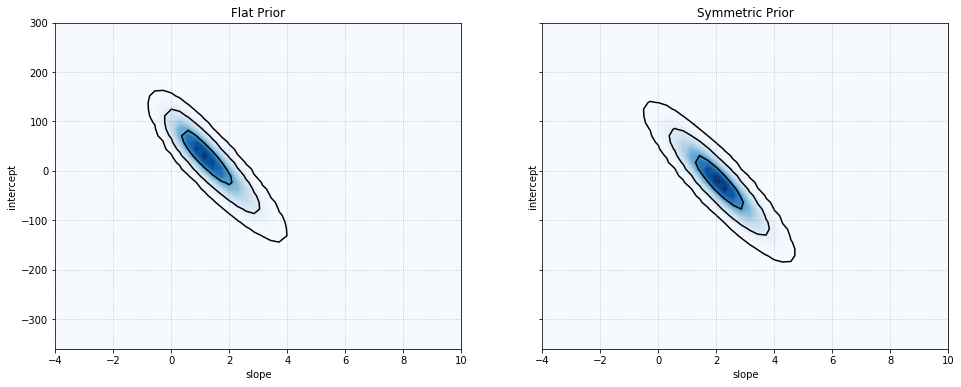

In [75]:
# The dictionary MAP (= maximum a posteriori) should return the mode 
# of the posterior distribution.
# The key is the prior and the value is resulting posterior mode (peak)
# given as theta* = [b*, m*]
MAP={}
MAP['uniform_prior'] = [0.0, 0.0]
MAP['symmetric_prior'] = [0.0, 0.0]


# 
# YOUR CODE HERE
# 
type(MAP)
slope = (-4,10)
intercept = (-360,300)
slope_range=np.linspace(*slope)
intercept_range = np.linspace(*intercept)
logP1=[[log_posterior_Symmetric([b,m], x, y)
       for m in slope_range] for b in intercept_range]

logP2= [[log_posterior_flat([b,m], x, y)
        for m in slope_range] for b in intercept_range]
#logP2=[[log_likelihood([b,m],x,y,dy)+log_symmetric_prior([b,m])

resultSym = minimize(miniSym, x0=[0, 0], args=(x, y, dy) )
print(resultSym)

resultFlat = minimize(miniFlat, x0=[0, 0], args=(x, y, dy) )
print(resultFlat)

MAP['symmetric_prior'] = resultSym.x
MAP['uniform_prior'] =  resultFlat.x   

P1 = np.exp(logP1-np.max(logP1))
print(P1.shape)
P2 = np.exp(logP2-np.max(logP2))


fig , ax = plt.subplots(1,2,figsize=(16,6),sharex=True, sharey= True)
ax[0].contourf(slope_range,intercept_range,P1, figsize=(16 ,6), sharex=True, Sharey= True)
ax[0].contourf(slope_range,intercept_range,P1,100, cmap='Blues')
ax[0].contour(slope_range,intercept_range,P1,contour_levels(P1), colors='black')
ax[0].set_title('Flat Prior')
ax[1].contourf(slope_range,intercept_range,P2,100, cmap='Blues')
ax[1].contour(slope_range,intercept_range,P2,contour_levels(P2), colors='black')
ax[1].set_title('Symmetric Prior')
for axi in ax:
    axi.grid('on', linestyle=':',color='gray',alpha=0.5)
    axi.set_axisbelow(False)
    axi.set_xlabel('slope')
    axi.set_ylabel('intercept')


In [76]:
for prior in ['uniform_prior','symmetric_prior']:
    assert len(MAP[prior])==2, f'{prior}: The length of the MAP mode should be 2.'
    assert MAP[prior][0] != 0.0, f'{prior}: The intercept should not be 0.0.'
    assert MAP[prior][1] != 0.0, f'{prior}: The slope should not be 0.0.'
    

- Plot the joint posterior for the two model parameters for the two different priors.
- Indicate whether the slope and the intercept are correlated or anti-correlated.

In [77]:
# 
# YOUR CODE HERE
# 

## Problem 3: MCMC sampling of a Lorentzian pdf using the random walk Metropolis algorithm
### (3 points)

Say that we have some function that tells us the (possibly unnormalized) probability of a given position in a one-dimensional space. Note, however, that a key feature of the approach that we will implement here is that it can be extended to many dimensions. 

We will assume a known, specific form of this univariate pdf, namely a Lorentzian (Cauchy) distribution, but it might just as well be some very complicated function that can only be evaluated numerically. All that is needed is some function that, for each position in the parameter space, returns a probability density.

Let us start by studying the pdf that we will be sampling from using a random walk (using the Metropolis algorithm outlined below).

In [78]:
# Modules needed for this exercise
from scipy.stats import norm
from scipy.stats import cauchy

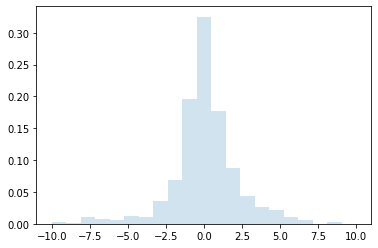

In [79]:
# Draw a number of random samples from the standard Cauchy
r = cauchy.rvs(size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2, 
         range=(-10,10),bins=21);

This histogram corresponds to a finite sample from the pdf of a standard Cauchy (Lorentzian)
$$ 
p(x | \alpha=0, \beta=1) = \frac{1}{\pi(1+x^2)}, 
$$
with mean $\alpha=0$ and FWHM $2\beta = 2$.

- How does this pdf compare with a standard normal distribution $\mathcal{N}(x;\mu=0,\sigma^2=1)$?

First, turn the posterior into a callable function. You should deliberately remove the normalization to make the point that sampling can be made for an unnormalized pdf. Note that we will work directly with the pdf here (not taking the log as in previous examples).

In [80]:
def posterior_function(x, normalized=False):
    '''
    Return the posterior pdf given by a standard Cauchy (Lorentzian).
    
    Args:
        x: position in a one-dimensional space
        normalized: Return a normalized pdf if True (optional, default=False)
    '''
    # YOUR CODE HERE
    
    if normalized==True:
        pdf=1/np.pi*(1/(1+x**2))  
        return pdf
    else:
        pdf=1/(1+x**2)
        return pdf

In [81]:
posterior_function(0.5, normalized=False)

0.8

In [82]:
# Predefined function for visualization.
# No changes are needed.
def plot_proposal(posterior_func, current_position, p_current, 
                  proposed_position, p_proposal, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))
    fig.suptitle('Iteration %i' % (i + 1),fontsize=14)
    x = np.linspace(-5, 5, 5000)
    color = 'g' if accepted else 'r'
    label_text = 'Accepted' if accepted else 'Rejected'
        
    # Plot posterior
    ax1.plot(x, posterior_func(x))
    ax1.plot([current_position] * 2, [0, p_current], marker='o', color='b')
    ax1.plot([proposed_position] * 2, [0, p_proposal], marker='o', color=color)
    ax1.annotate("", xy=(proposed_position, 0.2), xytext=(current_position, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', \
            title=f'current: posterior(x={current_position:.2f}) = {p_current:.2}\n'+\
            f'proposal: posterior(x={proposed_position:.2}) = {p_proposal:.2}')
    
    if accepted:
        trace.append(proposed_position)
    else:
        trace.append(current_position)
        
    # Posterior histogram
    ax2.plot(x, posterior_function(x, normalized=True)) # properly normalized
    sns.distplot(trace, kde=False, norm_hist=True, ax=ax2)
    ax2.axvline(current_position, color='b', linestyle='--', 
                label='current position')
    ax2.axvline(proposed_position, color=color, linestyle='--', 
                label='proposed position')
    ax2.annotate("", xy=(proposed_position, 0.2), xytext=(current_position, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.annotate(label_text, xy=(proposed_position, 0.5), color=color,rotation=270,fontsize=14)

    
    ax3.plot(trace)
    ax3.set(xlabel='iteration', ylabel='position', title='trace')
    plt.tight_layout()

Now on to the sampling. The code for a MCMC sampler that uses the Metropolis algorithm is enclosed below. However, it misses a few critical steps and it is your task to add them at the correct places.

1. At first, you have the starting parameter position (that can be randomly chosen), lets fix it to the input argument `start_position`:

```python
current_position = start_position
```

Then, you propose to move (jump) from that position somewhere else (that's the Markov part). You can be very dumb or very sophisticated about how you come up with that proposal. The Metropolis sampler is very dumb and just takes a sample from a proposal distribution (here we again choose a normal distribution) centered around your current position (i.e. `current_position`) with a certain standard deviation (`proposal_width`) that will determine how far you propose jumps 

2. Use `scipy.stats.norm` to create `proposed_position` with a step based on a draw from `current_position` with a width `proposal_width`.

Next, you evaluate whether that's a good place to jump to or not. We quantify this by computing the probability of the proposed position in parameter space, i.e. evaluating the posterior pdf at the proposed position. Usually you would use log probabilities but we omit this here.

3. Compute both `p_current` and `p_proposal`.

Up until now, we essentially have a hill-climbing algorithm that would just propose movements into random directions and only accept a jump if the `proposed_position` has higher likelihood than `current_position`. Eventually we'll get to `x = 0` (or close to it) from where no more moves will be possible. However, we want to get a posterior pdf so we'll also have to sometimes accept moves into the other direction. The key trick is by dividing the two probabilities,

```python
p_accept = p_proposal / p_current
```

we get an acceptance probability. Note that the acceptance probability is obtained by dividing the posterior of proposed parameter setting by the posterior of the current parameter setting. This implies that the posterior pdf does not necessarily need to be nomalized, the normalization factor will anyway be canceled out. 

You can see that if `p_proposal` is larger, that probability will be `> 1` and we'll definitely accept. However, if `p_current` is larger, say twice as large, there'll be a 50% chance of moving there which we will decide by drawing a random number.

4. Add the acceptance step by comparing `p_accept` to a random number (uniform [0,1]). The `current_position` should be updated if the `accept` variable is `True`.

This simple procedure gives us samples from the posterior.

The code below also calls a fancy visualization function `plot_proposal` if the optional keyword argument `plot=True`.

In [83]:
def sampler(posterior_func, no_of_samples=4, start_position=.5, 
            proposal_width=1., plot=False):
    current_position = start_position
    samples = [current_position]
    trace= [current_position]


    for i in range(no_of_samples-1):  # num_steps-1 so k_array[i+1] is always defined
        # 2. Propose a step
        proposed_position=norm(current_position,proposal_width).rvs()
         # 3. Calculate Metropolis ratio
        p_current = posterior_func(current_position)
        p_proposal = posterior_func(proposed_position)
        p_accept=p_proposal / p_current
        rand=np.random.rand()
        accept=rand < p_accept
        
                
        #trace.append(current_position)
                
        # Visualization
        if plot:
            assert no_of_samples < 11, "Too many samples for visualization"
            plot_proposal(posterior_func, current_position, p_current, 
                          proposed_position, p_proposal, accept, samples, i)
        
        # Possibly update position
        # 3 columns,1 normalized,2 proposed positions,(trace+posterior)
        # YOUR CODE HERE
        # 
        if rand < accept:
             current_position = proposed_position # step to the right
             trace.append(proposed_position)
             
        else:
                trace.append(current_position)
            
        samples.append(current_position)
    
    return np.array(samples)
    

In [84]:
np.random.seed(2020)
test_samples = sampler(posterior_function, no_of_samples=2)
assert test_samples[0]==0.5, 'The first position sample should be the defalut start position = 0.5'
assert np.abs(test_samples[1]-(-1.26884571))<0.001, 'The first sample given the default proposal'+\
    ', the correct posterior_function and the provided random seed.'

#### Visualization of Metropolis sampling procedure:
To visualize the sampling, we'll create plots for some quantities that are computed. Each row below is a single iteration through our Metropolis sampler. These tests will also allow you to check whether your sampler works as expected.

The first column displays our unnormalized posterior distribution. This is for visualization only, normally we would not be able to plot a nice curve to show the posterior. Here, we plug in our $x$ proposals. The vertical lines represent our current position in blue and our proposed position in either red or green (rejected or accepted, respectively). 

The 2nd column is our posterior distribution. Here we are displaying the normalized posterior as the blue curve compared to the normalized histogram of samples (green bars) and the move that was just proposed.

The 3rd column is our trace (i.e. the posterior samples of visited positions that we're generating). Note that we store a sample at each iteration, irrespective of whether the proposal was accepted or rejected. In the latter situation, we keep the previous position and the line just stays constant.

Note that we always accept moves to relatively more likely $x$ values (in terms of their posterior density), but only sometimes to relatively less likely $x$ values, as can be seen already in the first iteration, and later in iterations 6, 7, and 8 (the iteration number can be found at the top center of each row).

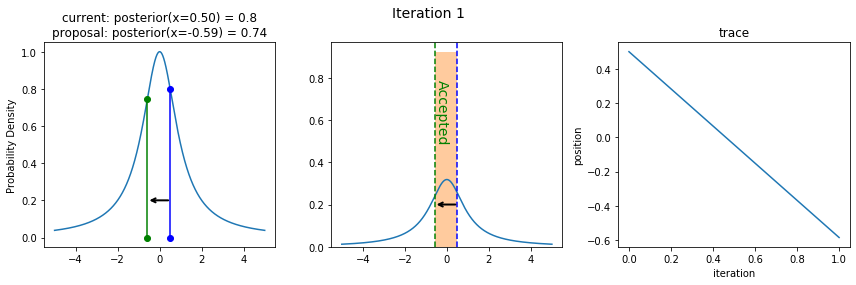

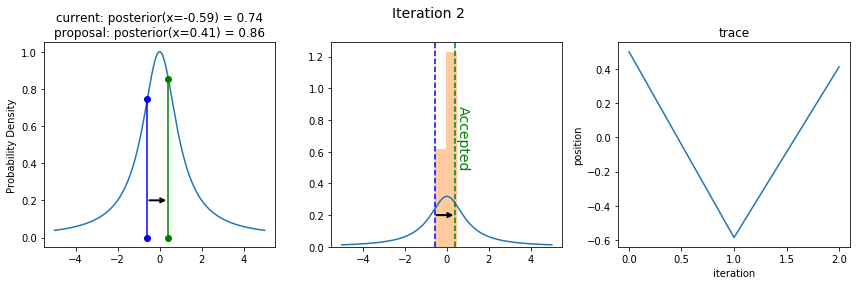

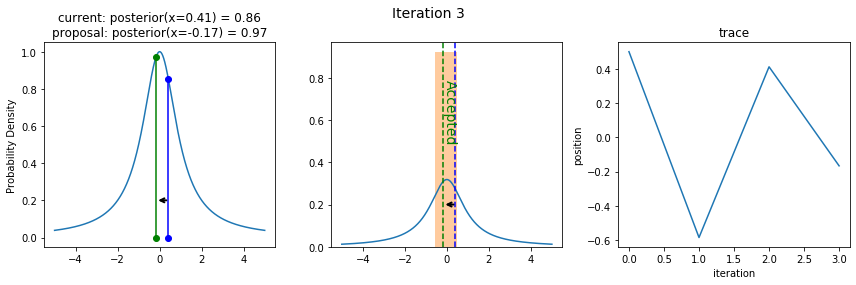

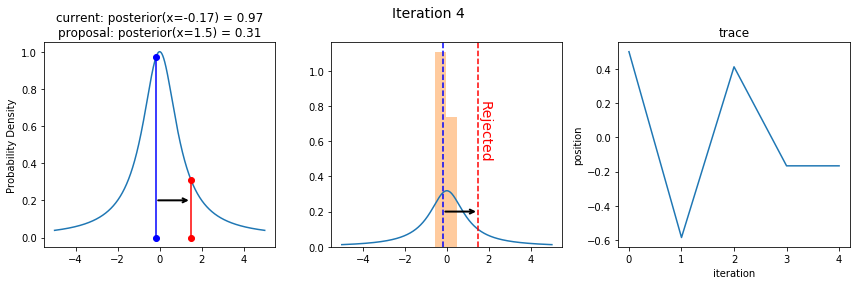

In [85]:
np.random.seed(123)
try:
    samples = sampler(posterior_function, no_of_samples=5, start_position=.5, proposal_width=1., plot=True);
except:
    print('The method "sampler" must be defined and working as expected.')

Now the magic of MCMC is that you just have to do that for a long time, and the samples that are generated in this way come from the posterior distribution of your model. There is a rigorous mathematical proof that guarantees this which we won't go into detail here.

#### Final task:
Draw 100,000 samples from your sampler and plot:
* The trace (i.e. the sequence of draws of your single parameter x)
* A normalized histogram of the samples compared to the true posterior pdf (normalized).

In [43]:
try:
    samples = sampler(posterior_function, no_of_samples=100000, start_position=1.)
except:
    samples=None
    print('The method "sampler" must be defined and working as expected.')

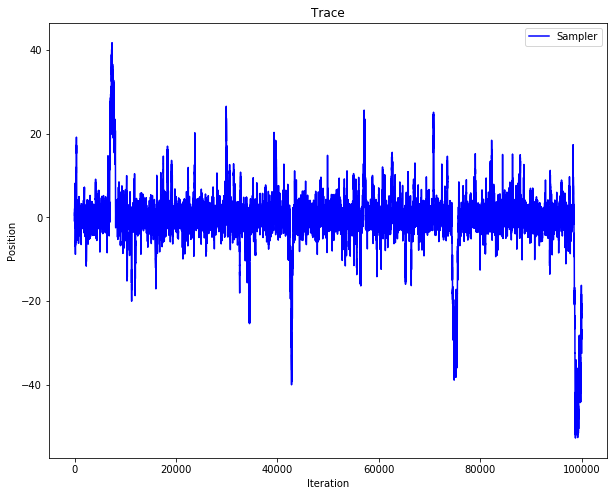

In [44]:
# Plotting commands here
#
# 
# YOUR CODE HERE
# 

fig,ax = plt.subplots(figsize=(10,8))
ax.plot(samples,'b-',label = 'Sampler')
ax.set(xlabel='Iteration', ylabel='Position', title='Trace',alpha=0.3)
ax.legend(loc='best')

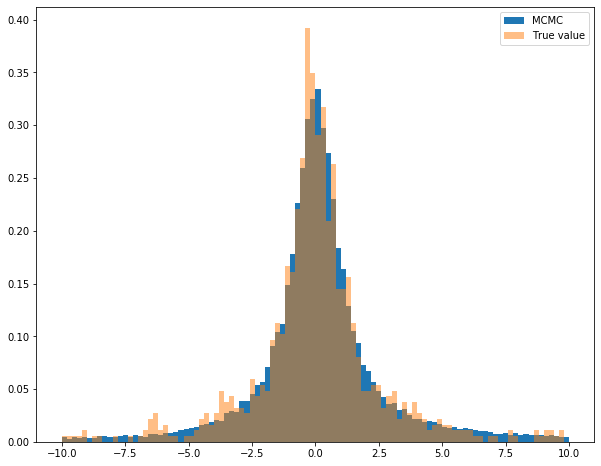

In [46]:
fig2,ax2 = plt.subplots(figsize=(10,8))
ax2.hist(samples,density=True, histtype='stepfilled', 
         range=(-10,10),bins=100,label='MCMC')
ax2.hist(r, density=True, histtype='stepfilled', 
         range=(-10,10),bins=100,label='True value',alpha=0.5)
ax2.legend(loc='best')

In [37]:
assert np.abs(samples.mean())<0.2, 'The mean of the samples should be close to the mean of the posterior pdf (=0.0)'

## Problem 4: Signal and background
### (3 points)

The goal of this problem is to estimate the amplitude of a signal when there is a background.  We'll take a limiting case where the background is flat, so it is completely specified by its magnitude $B > 0$, and the signal is known to be a Gaussian with unknown amplitude $A$ but (at least initially) known position (mean) and width (standard deviation). The measurements will be integer numbers of counts $\{N_k\}$ in well-defined (equally spaced) bins $\{x_k\}$, where $k$ runs over integers labeling the bins.  
- The goal therefore translates into finding $A$ and $B$ given $\{N_k\}$ and all the other information (bin sizes, signal position and width). 
- Alternatively, we can modify our goal. Maybe we do not care about $B$, or we care only about $B$.

Our statistical model includes the true signal plus a constant background. The signal and the background magnitudes are the unknown parameters while the other parameters dictating the signal (width $w$ and mean $x_0$ of the Gaussian) are known and fixed:

$$
   D_k = n_0 \left[ A e^{-(x_k-x_0)^2/2 w^2} + B \right]
$$

Here $n_0$ is a constant that scales with measurement time.  Note that $D_k$ is not an integer in general, unlike $N_k$.

In [86]:
# import statements.
# We use pickle to save and load a python dictionary
import pickle
# factorial from the math module is useful. You might consider other modeules as well.
from math import factorial

# 
# YOUR CODE HERE
# 

In [87]:
# This function generates data according to the statistical model
A_true = 1.
B_true = 2.
width = np.sqrt(5.)   
x_0 = 0

def exact_data(A, B, n_0, x_k, x_0=0., width=np.sqrt(5.)):
    """
    Return the exact signal plus background.  The overall scale is n_0,
    which is determined by how long counts are collected. 
    """
    return n_0 * (A * np.exp(-(x_k - x_0)**2/(2.*width**2)) + B)

#### Poisson distribution
We are imagining a counting experiment, so the statistics of the counts we record will follow a Poisson distribution.

The Poisson discrete random variable from scipy.stats is defined by (see [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html))

$$
p(k \mid \mu) = \frac{\mu^k e^{-\mu}}{k!} \quad \mbox{for }k\geq 0 \;.
$$

where $k$ is an integer and $\mu$ is called the shape parameter. The mean and variance of this distribution are both equal to $\mu$. Sivia and Gregory each use a different notation for for this distribution, which means you need to be flexible. 

For convenience, we'll define our own version in this notebook:

$$
p(N \mid D) = \frac{D^N e^{-D}}{N!} \quad \mbox{for }N\geq 0 \;.
$$

where $N$ is an integer.

In [88]:
# make a dataset for exploring
def make_dataset(A_true, B_true, width, x_0, databins=15, delta_x=1, D_max=100):
    """
    Create a data set based on the number of bins (databins), the spacing
    of bins (delta_x), and the maximum we want the exact result to have
    (D_max, this fixes the n_0 parameter).
    
    Return arrays for the x points (xk_pts), the corresponding values of the
    exact signal plus background in those bins (Dk_pts), the measured values
    in those bins (Nk_pts, integers drawn from a Poisson distribution), the 
    maximum extent of the bins (x_max) and n_0.
    """
    # set up evenly spaced bins, centered on x_0
    x_max = x_0 + delta_x * (databins-1)/2
    xk_pts = np.arange(-x_max, x_max + delta_x, delta_x, dtype=int)
    
    # scale n_0 so maximum of the "true" signal plus background is D_max
    n_0 = D_max / (A_true + B_true)  
    Dk_pts = exact_data(A_true, B_true, n_0, xk_pts, width=width)
    
    # sample for each k to determine the measured N_k
    Nk_pts = [stats.poisson.rvs(mu=Dk) for Dk in Dk_pts]
    
    return xk_pts, Dk_pts, Nk_pts, x_max, n_0

#### Plot the signal and the data (these tasks are not graded but will help you to understand the problem)
* Make a plot of the true signal plus background we are trying to deduce. Use $A_\mathrm{true}=1$ and $B_\mathrm{true}=2$ and the signal position (mean) $x_0=0$ and width (standard deviation)  $w=\sqrt{5}$.

We consider what happens for fixed signal and background but changing the experimental conditions specified by `D_max` and `databins` (we'll keep `delta_x` fixed to 1). In all cases the bins are symmetric around $x=0$.
* Make four subplots that correspond to the data from four differently designed counting experiments. 
  1. Baseline case: 15 bins and maximum expection of 100 counts.
  1. Low statistics case: 15 bins and maximum expection of only 10 counts.
  1. Greater range case: 31 bins (with fixed bin width) and same maximum expection of 100 counts as in baseline case.
  1. Smaller range case: 7 bins (with fixed bin width) and same maximum expection of 100 counts as in baseline case.
 

Loaded "data" dictionary from file.
Extract data with:
xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data[case]
where the key "case" is one of:
dict_keys(['Baseline', 'Low Statistics', 'Greater Range', 'Smaller Range'])


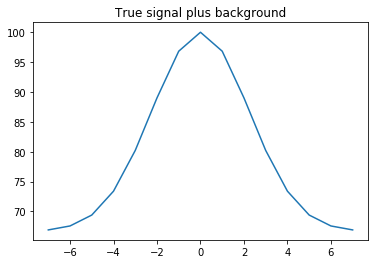

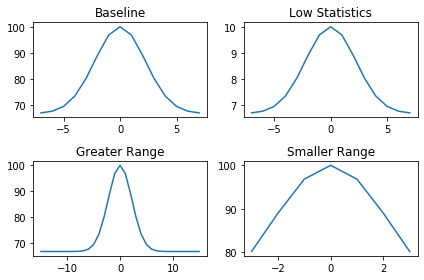

In [89]:
# Plotting the signal and background
#
# 
# YOUR CODE HERE
#
xk_pts, Dk_pts, Nk_pts, x_max, n_0 = make_dataset(1, 2, np.sqrt(5.), 0, databins=15, delta_x=1, D_max=100)
plt.plot(xk_pts, Dk_pts)
plt.title('True signal plus background')


# The data has been generated already and will be loaded from a pickle file.
# It is a dictionary with four keys corresponding to the four cases, and each value
# corresponding to xk_pts, Dk_pts, Nk_pts, x_max, n_0
with open(f'{DATA_DIR}/data_signal_and_background.pickle','rb') as f:
    data = pickle.load(f)
    print('Loaded "data" dictionary from file.')
    print('Extract data with:')
    print('xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data[case]')
    print('where the key "case" is one of:')
    cases = data.keys()
    print(cases)

# Plotting the data for the four cases
#
# 
# YOUR CODE HERE
#   
figure, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].set_title('Baseline')
xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data['Baseline']
axes[0, 0].plot(xk_pts,Dk_pts)
    
axes[0, 1].set_title('Low Statistics')
xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data['Low Statistics']
axes[0, 1].plot(xk_pts,Dk_pts)
    
axes[1, 0].set_title('Greater Range')
xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data['Greater Range']
axes[1, 0].plot(xk_pts,Dk_pts)
    
axes[1, 1].set_title('Smaller Range')
xk_pts, Dk_pts, Nk_pts, x_max, n_0 = data['Smaller Range']
axes[1, 1].plot(xk_pts,Dk_pts)
    
figure.tight_layout()


#### Graded subtasks
##### Subtask a. [2 points]
* Implement functions for the (log) likelihood and for a uniform (log) prior. Let's use a uniform prior for $0 \le A \le 5$ and $0 \le B \le 5$.
* Evaluate the log-posterior on a grid. Plot both the joint and the marginalized posterior pdfs for the four cases.

In [90]:
# Define the pdfs and combine with Bayes' theorem.

def log_prior(A, B):
    """
    Log prior .
    
    We take a uniform (flat) prior with large enough
    maximums but, more importantly, require positive values for A and B.
    """
    A_max = 5.
    B_max = 5.
    # flat prior 
    if np.logical_and(A <= A_max, B <= B_max).all(): 
        return np.log(1/(A_max * B_max))
    else:
        return -np.inf


def log_likelihood(A, B, xk_pts, Nk_pts, n_0):
    """Log likelihood for data Nk_pts given A and B"""
    # 
    # YOUR CODE HERE
    # 
    multi=1
    sum_0 = 0;sum_1 = 0;sum_2 = 0;
    
    for i in range (len(xk_pts)):
        D = n_0 *(A*np.exp((-xk_pts[i]**2)/(10))+B) 
        sum_0 = sum_0+D
        sum_1 = sum_1 + np.log(Nk_pts[i])
        sum_2 = sum_2+(Nk_pts[i]*np.log(D))
    likli = - sum_0 - sum_1 + sum_2
    
    return likli
    
def log_posterior(A, B, xk_pts, Nk_pts, n_0):
    """Log posterior for data Nk_pts given A and B"""
    return log_prior(A, B) + log_likelihood(A, B, xk_pts, Nk_pts, n_0)

# Other utility code can be put here (if needed)
#
# 
# YOUR CODE HERE
#

Text(0.5, 1.0, 'Flat Prior Smaller Range')

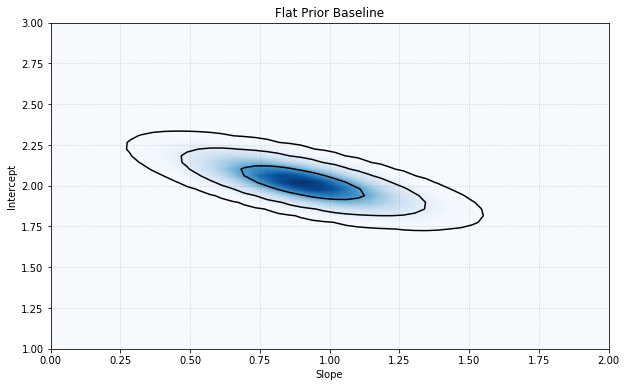

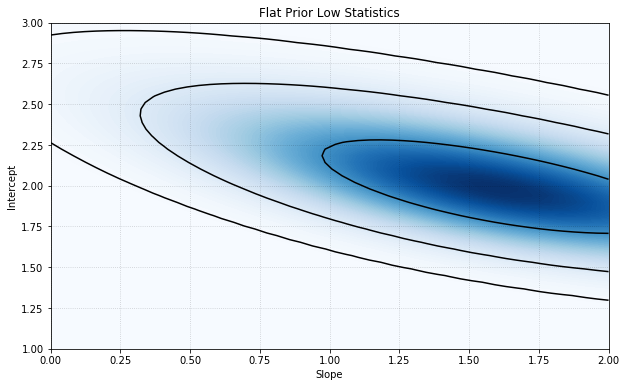

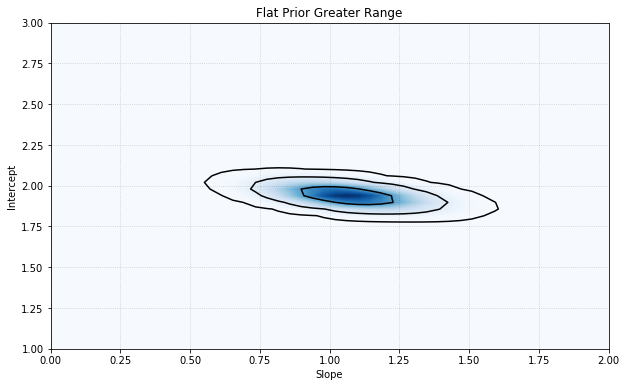

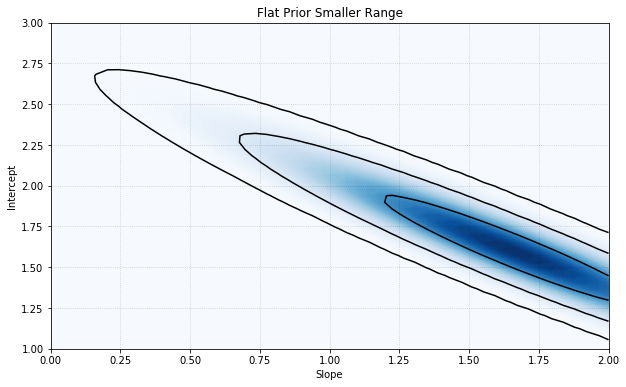

In [91]:
# Optional.
# Code to find contour levels of gridded 2D posterior.

def find_contour_levels(grid):
    """Compute 1, 2, 3-sigma contour levels for a gridded 2D posterior
       Note: taken from BayesianAstronomy but may not work here.
    """
    sorted_ = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(sorted_) / np.sum(sorted_)
    cutoffs = np.searchsorted(pct, np.array([0.68, 0.95, 0.997]) ** 2)
    return np.sort(sorted_[cutoffs])

# 
# YOUR CODE HERE
# 

A = (1,5)
B = (1,5)

A_distr = np.linspace(0, 2, num=50)
B_distr = np.linspace(1, 3, num=50)

with open(f'{DATA_DIR}/data_signal_and_background.pickle','rb') as f:
    data = pickle.load(f)
    log_p1=[[log_posterior(i, j, (data)['Baseline'][0], (data)['Baseline'][2], (data)['Baseline'][4])
             for i in A_distr] for j in B_distr]
    P1= np.exp(log_p1-np.max(log_p1))
    
    log_p2=[[log_posterior(i, j, (data)['Low Statistics'][0], (data)['Low Statistics'][2], (data)['Low Statistics'][4])
             for i in A_distr] for j in B_distr]
    P2= np.exp(log_p2-np.max(log_p2))
    
    log_p3=[[log_posterior(i, j, (data)['Greater Range'][0], (data)['Greater Range'][2], (data)['Greater Range'][4])
             for i in A_distr] for j in B_distr]
    P3= np.exp(log_p3-np.max(log_p3))
    
    log_p4=[[log_posterior(i, j, (data)['Smaller Range'][0], (data)['Smaller Range'][2], (data)['Smaller Range'][4])
             for i in A_distr] for j in B_distr]
    P4= np.exp(log_p4-np.max(log_p4))
    

fig1 , ax1 = plt.subplots(1,1,figsize=(10,6),sharex=True, sharey= True)
ax1.contourf(A_distr,B_distr,P1,100, cmap='Blues')
ax1.contour(A_distr,B_distr,P1,find_contour_levels(P1), colors='black')
ax1.grid('on', linestyle=':',color='black',alpha=0.2)
ax1.set_axisbelow(False)
ax1.set_xlabel('Slope')
ax1.set_ylabel('Intercept')
ax1.set_title('Flat Prior Baseline')

fig2 , ax2 = plt.subplots(1,1,figsize=(10,6),sharex=True, sharey= True)
ax2.contourf(A_distr,B_distr,P2,100, cmap='Blues')
ax2.contour(A_distr,B_distr,P2,find_contour_levels(P2), colors='black')
ax2.grid('on', linestyle=':',color='black',alpha=0.2)
ax2.set_axisbelow(False)
ax2.set_xlabel('Slope')
ax2.set_ylabel('Intercept')
ax2.set_title('Flat Prior Low Statistics')

fig3 , ax3 = plt.subplots(1,1,figsize=(10,6),sharex=True, sharey= True)
ax3.contourf(A_distr,B_distr,P3,100, cmap='Blues')
ax3.contour(A_distr,B_distr,P3,find_contour_levels(P3), colors='black')
ax3.grid('on', linestyle=':',color='black',alpha=0.2)
ax3.set_axisbelow(False)
ax3.set_xlabel('Slope')
ax3.set_ylabel('Intercept')
ax3.set_title('Flat Prior Greater Range')

fig4 , ax4 = plt.subplots(1,1,figsize=(10,6),sharex=True, sharey= True)
ax4.contourf(A_distr,B_distr,P4,100, cmap='Blues')
ax4.contour(A_distr,B_distr,P4,find_contour_levels(P4), colors='black')
ax4.grid('on', linestyle=':',color='black',alpha=0.2)
ax4.set_axisbelow(False)
ax4.set_xlabel('Slope')
ax4.set_ylabel('Intercept')
ax4.set_title('Flat Prior Smaller Range')




##### Subtask b. [1 points]
* Use the text cell below to discuss the following questions:
  1. Can you understand why the signal and background amplitudes are anticorrelated? And why the (anti)correlation seems to be stronger in one of the cases? 
  1. Can you understand the difference in widths of the pdfs in the four cases?
  1. What are your conclusions for how to design the experiment given limited resources? 
    - In particular, given that you wanted to be able to distinguish between signal amplitude and background, would it then be better to have many counts in few bins, or the same total amount of counts spread over a wider interval? 

* * *
**PLEASE WRITE YOUR ANSWER HERE** 
* * *